In [9]:
import pandas as pd


In [10]:
# df = pd.read_csv("C:/Users/ayan1/OneDrive/Documents/Course/Machine Learning Using Python/Data Folder/laptop_pricing.csv",header=0)
df = pd.read_csv('laptop_pricing__1_.csv',header=0)
df.head()

,Manufacturer,IntelCore(i-),IntelCoreGen,processing speed(GHz),Ram(gb),HDD(gb),SSD(gb),Graphics(gb),ScreenSize(inch),Price
0,Dell,3,7,2.29,4.0,1000,0,0,15.6,39057
1,Dell,3,7,2.30,4.0,1000,0,0,15.6,45141
2,HP,3,7,2.30,8.0,256,256,0,14.0,35999
3,ASUS,3,7,2.30,NaN,1000,0,0,14.0,39990
4,HP,3,7,2.40,4.0,1000,0,0,15.6,36263


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           105 non-null    object 
 1   IntelCore(i-)          105 non-null    int64  
 2   IntelCoreGen           105 non-null    int64  
 3   processing speed(GHz)  105 non-null    float64
 4   Ram(gb)                96 non-null     float64
 5   HDD(gb)                105 non-null    int64  
 6   SSD(gb)                105 non-null    int64  
 7   Graphics(gb)           105 non-null    int64  
 8   ScreenSize(inch)       105 non-null    float64
 9   Price                  105 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 8.3+ KB


In [12]:
df['Ram(gb)'] = df['Ram(gb)'].fillna(df['Ram(gb)'].mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           105 non-null    object 
 1   IntelCore(i-)          105 non-null    int64  
 2   IntelCoreGen           105 non-null    int64  
 3   processing speed(GHz)  105 non-null    float64
 4   Ram(gb)                105 non-null    float64
 5   HDD(gb)                105 non-null    int64  
 6   SSD(gb)                105 non-null    int64  
 7   Graphics(gb)           105 non-null    int64  
 8   ScreenSize(inch)       105 non-null    float64
 9   Price                  105 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 8.3+ KB


# Practice of decision tree

In [14]:
import pandas as pd
# load data
# df = pd.read_csv("C:/Users/ayan1/OneDrive/Documents/Course/Machine Learning Using Python/Data Folder/laptop_pricing__1_.csv",header=0)
df = pd.read_csv('laptop_pricing__1_.csv',header=0)

In [15]:
df['Ram(gb)'] = df['Ram(gb)'].fillna(df['Ram(gb)'].mean())

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Manufacturer           105 non-null    object 
 1   IntelCore(i-)          105 non-null    int64  
 2   IntelCoreGen           105 non-null    int64  
 3   processing speed(GHz)  105 non-null    float64
 4   Ram(gb)                105 non-null    float64
 5   HDD(gb)                105 non-null    int64  
 6   SSD(gb)                105 non-null    int64  
 7   Graphics(gb)           105 non-null    int64  
 8   ScreenSize(inch)       105 non-null    float64
 9   Price                  105 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 8.3+ KB


In [17]:
df.Manufacturer.unique()

array(['Dell', 'HP', 'ASUS', 'Lenovo'], dtype=object)

In [18]:
df = pd.get_dummies(df,columns=['Manufacturer'],drop_first=True)

In [19]:
from sklearn.model_selection import train_test_split

x = df.drop(['Price'],axis=1).astype(float)
y= df['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn import tree
from IPython.display import Image
import pydotplus

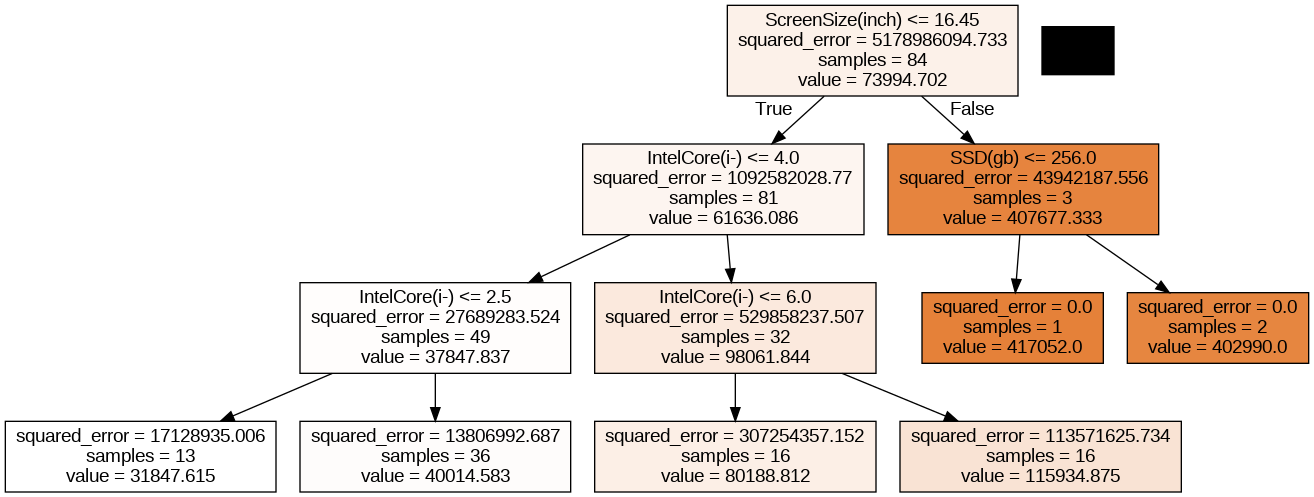

In [22]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(x_train, y_train)
dot_data = tree.export_graphviz(regtree1, out_file=None,feature_names= x_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())